<a href="https://colab.research.google.com/github/rubeshajith/Classification-Project/blob/main/Deployed_in_Streamlit_PriceRangeClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# Importing Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
import pickle

In [28]:
df = pd.read_csv('/content/drive/MyDrive/data/project/Mobile Price Range Prediction/data_mobile_price_range.csv')

In [29]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [30]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [31]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [32]:
x= df.iloc[:,0:20]
y = df.iloc[:,20:]

## Feature Importance Selection

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
feat_imp = ExtraTreesClassifier()
feat_imp.fit(x,y)

ExtraTreesClassifier()

In [34]:
print(feat_imp.feature_importances_)

[0.06080265 0.02082044 0.0343076  0.01995499 0.03359089 0.01771678
 0.03582777 0.03463052 0.03751751 0.03427812 0.03419221 0.04815072
 0.04979729 0.38042018 0.034369   0.03457194 0.03557645 0.01465171
 0.01817522 0.02064801]


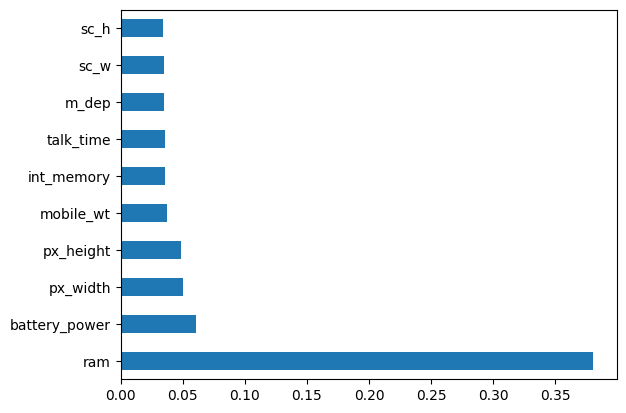

In [35]:
feat_importances = pd.Series(feat_imp.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Selecting the top 10 best features and dropping the remaining columns

In [36]:
# To display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

n_core, sc_h,talk_time,sc_w,int_memory,mobile_wt,px_h,px_w,battery_pwoer,ram

In [61]:
df.describe()

,battery_power,int_memory,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,32.046500,140.249000,4.520500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,18.145715,35.399655,2.287837,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,2.000000,80.000000,1.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,16.000000,109.000000,3.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,32.000000,141.000000,4.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,48.000000,170.000000,7.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,64.000000,200.000000,8.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


In [37]:
df.drop(df.columns[[1,2,3,4,5,7,10,17,18,19]],axis=1,inplace=True)

In [38]:
df.head()

,battery_power,int_memory,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,7,188,2,20,756,2549,9,7,19,1
1,1021,53,136,3,905,1988,2631,17,3,7,2
2,563,41,145,5,1263,1716,2603,11,2,9,2
3,615,10,131,6,1216,1786,2769,16,8,11,2
4,1821,44,141,2,1208,1212,1411,8,2,15,1


In [59]:
df.describe()

,battery_power,int_memory,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,32.046500,140.249000,4.520500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,18.145715,35.399655,2.287837,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,2.000000,80.000000,1.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,16.000000,109.000000,3.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,32.000000,141.000000,4.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,48.000000,170.000000,7.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,64.000000,200.000000,8.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


In [60]:
df["battery_power"].max()

1998

In [40]:
x = df.iloc[:,0:10]
y = df.iloc[:,10:]

In [41]:
skfold = StratifiedKFold(n_splits=3)
model_c = RandomForestClassifier(criterion='entropy',n_estimators=10,random_state=0,n_jobs=-1)
results_skfold = model_selection.cross_val_score(model_c, x, y, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

Accuracy: 88.30%


In [42]:
skfold = StratifiedKFold(n_splits=3)
model_c = KNeighborsClassifier(n_neighbors=10)
results_skfold = model_selection.cross_val_score(model_c, x, y, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

Accuracy: 92.60%


In [43]:
skfold = StratifiedKFold(n_splits=3)
model_c = DecisionTreeClassifier()
results_skfold = model_selection.cross_val_score(model_c, x, y, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

Accuracy: 82.70%


In [44]:
knn = KNeighborsClassifier(n_neighbors=10)

In [45]:
knn.fit(x,y)

KNeighborsClassifier(n_neighbors=10)

In [46]:
filename= "trained_model.sav"
pickle.dump(knn,open(filename,'wb'))

In [47]:
loaded_model= pickle.load(open('trained_model.sav', 'rb'))

In [49]:
x.iloc[11:21,:]

,battery_power,int_memory,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,talk_time
11,1520,33,177,8,151,1005,3826,14,9,13
12,1815,33,159,4,607,748,1482,18,0,2
13,803,17,198,4,344,1440,2680,7,1,4
14,1866,52,185,1,356,563,373,14,9,3
15,775,46,159,2,862,1864,568,17,15,11
16,838,13,196,8,984,1850,3554,10,9,19
17,595,23,121,3,441,810,3752,10,2,18
18,1131,49,101,5,658,878,1835,19,13,16
19,682,19,121,4,902,1064,2337,11,1,18
20,772,39,81,7,1314,1854,2819,17,15,3


In [58]:
x.describe()

,battery_power,int_memory,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,32.046500,140.249000,4.520500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000
std,439.418206,18.145715,35.399655,2.287837,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955
min,501.000000,2.000000,80.000000,1.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,16.000000,109.000000,3.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,32.000000,141.000000,4.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,48.000000,170.000000,7.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,64.000000,200.000000,8.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


In [56]:
testing_data = x.iloc[15:20,:]
print(testing_data)

    battery_power  int_memory  mobile_wt  n_cores  px_height  px_width   ram  \
15            775          46        159        2        862      1864   568   
16            838          13        196        8        984      1850  3554   
17            595          23        121        3        441       810  3752   
18           1131          49        101        5        658       878  1835   
19            682          19        121        4        902      1064  2337   

    sc_h  sc_w  talk_time  
15    17    15         11  
16    10     9         19  
17    10     2         18  
18    19    13         16  
19    11     1         18  


In [55]:
input_data = (775,46,159,2,862,1864,568,17,15,11)
input_data_as_numpy_array= np.asarray(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)
pred= loaded_model.predict(input_data_reshape)
print(pred[0])
if pred[0] == 0:
  print("The mobile's price is LOW COST")
elif pred[0] == 1:
  print("The mobile's price is MEDIUM COST")
elif pred[0] == 2:
  print("The mobile's price is HIGH COST")
else:
  print("The mobile's price is VERY HIGH COST")

0
The mobile's price is LOW COST


## Streamlit web app

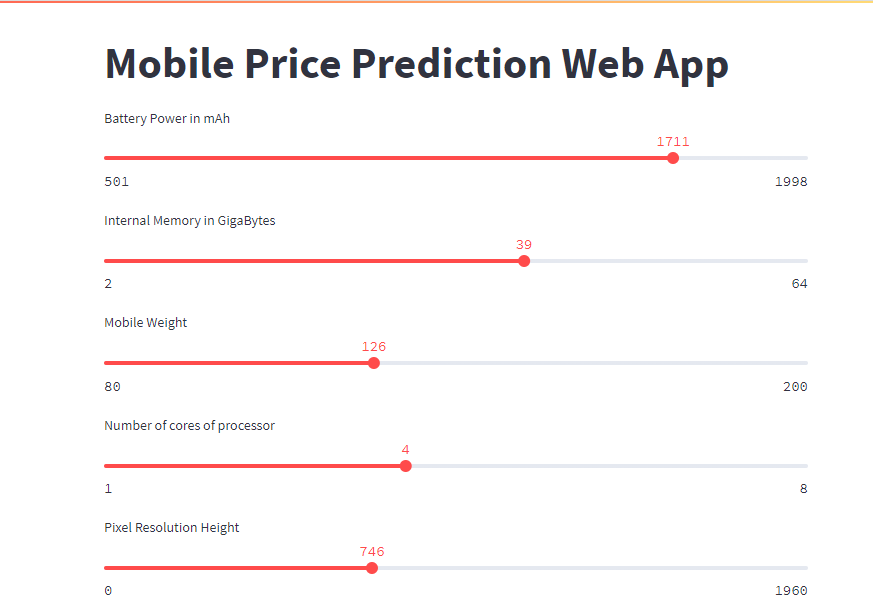
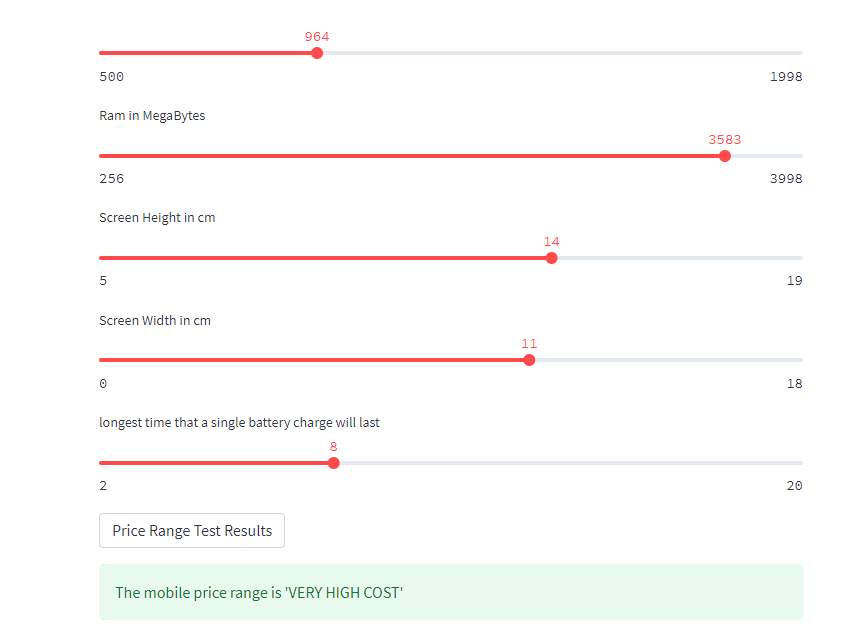